In [1]:
import pandas as pd
%matplotlib notebook
import numpy as np

In [24]:
mpu6000 = pd.read_csv('./20170520_roro1_testflight/imu_coupler_bay_calibration/mpu6000.csv', index_col='time')
#this is INS-board nb2

<IPython.core.display.Javascript object>


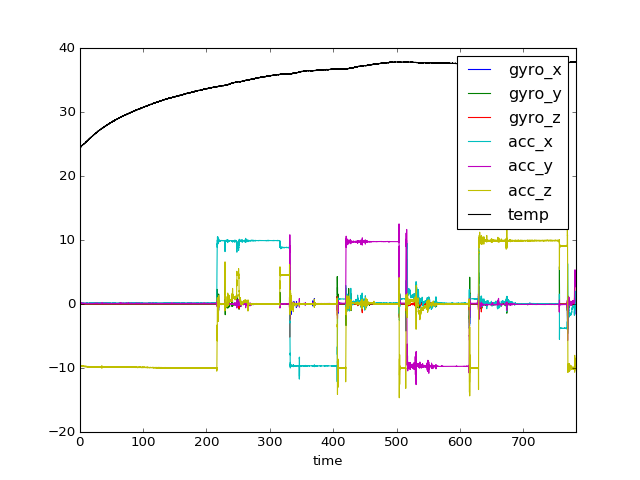

In [25]:
mpu6000.plot()

In [108]:
times = [ # sensor axis (board axis)
    [4*60+40, 5*60+10], # x+ (y-)
    [6*60+20, 6*60+40], # x- (y+)
    [7*60+50, 8*60+20], # y+ (x+)
    [9*60+40, 10*60+10], # y- (x-)
    [12*60+0, 12*60+30], # z+ (z+)
    [3*60+0, 3*60+30] # z- (z-)
]
cal = [mpu6000[a:b] for a, b in times]

In [109]:
times

[[280, 310], [380, 400], [470, 500], [580, 610], [720, 750], [180, 210]]

In [110]:
cal_i = ['x+', 'x-', 'y+', 'y-', 'z+', 'z-']
cal_mean = pd.DataFrame({i:f.mean() for f, i in zip(cal, cal_i)})
cal_mean

,x+,x-,y+,y-,z+,z-
gyro_x,-0.026274,-0.025778,-0.025523,-0.026275,-0.026657,-0.027558
gyro_y,-0.014982,-0.014814,-0.014883,-0.015190,-0.015211,-0.015079
gyro_z,-0.002515,-0.002288,-0.002134,-0.002022,-0.001112,-0.002487
acc_x,9.916271,-9.664853,0.151395,0.114220,0.047390,0.190739
acc_y,-0.015066,0.069739,9.754531,-9.748238,-0.068521,0.094058
acc_z,0.037622,-0.011978,0.027773,-0.053751,9.919030,-9.976020
temp,35.565120,36.626242,37.693831,37.587309,37.569454,33.519018


In [111]:
from statistics import mean, stdev

def bias_and_gain(cal, axis):
    """model: sensor = acc*gain + bias 
    -> acc = (sensor - bias) / gain
    """
    g_45deg = 9.806
    zero = (cal[axis+'+']['acc_'+axis] + cal[axis+'-']['acc_'+axis]) / 2
    two_g = cal[axis+'+']['acc_'+axis] - cal[axis+'-']['acc_'+axis]
    gain = two_g / 2 / g_45deg
    other_axes = [a for a in ['x', 'y', 'z'] if a != axis]
    zero_validate = [cal[a+sign]['acc_'+axis] for a in other_axes for sign in ['+', '-']]
    if (zero - mean(zero_validate)) / stdev(zero_validate) > 1:
        print('warning calibration data might be bad')
        print(mean(zero_validate), stdev(zero_validate), (zero - mean(zero_validate)) / stdev(zero_validate))
    return (zero, gain)

[print(a, bias_and_gain(cal_mean, a)) for a in ['x', 'y', 'z']]

x (0.12570896416609578, 0.9984256389897912)
y (0.0031463042356696391, 0.99443041010383559)
z (-0.028494989398200055, 1.0144324415852917)


[None, None, None]